# NuScenes

- Tutorial: <https://www.nuscenes.org/nuscenes?tutorial=nuscenes>

## A Gentle Introduction to nuScenes

In this part of the tutorial, let us go through a top-down introduction of our database. Our dataset comprises of elemental building blocks that are the following:

1. `log` - Log information from which the data was extracted.
2. `scene` - 20 second snippet of a car's journey.
3. `sample` - An annotated snapshot of a scene at a particular timestamp.
4. `sample_data` - Data collected from a particular sensor.
5. `ego_pose` - Ego vehicle poses at a particular timestamp.
6. `sensor` - A specific sensor type.
7. `calibrated sensor` - Definition of a particular sensor as calibrated on a particular vehicle.
8. `instance` - Enumeration of all object instance we observed.
9. `category` - Taxonomy of object categories (e.g. vehicle, human).
10. `attribute` - Property of an instance that can change while the category remains the same.
11. `visibility` - Fraction of pixels visible in all the images collected from 6 different cameras.
12. `sample_annotation` - An annotated instance of an object within our interest.
13. `map` - Map data that is stored as binary semantic masks from a top-down view.

The database schema is visualized below. For more information see the [nuScenes schema](https://github.com/nutonomy/nuscenes-devkit/blob/master/docs/schema_nuscenes.md) page.
![](https://www.nuscenes.org/public/images/nuscenes-schema.svg)

In [2]:
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='../msdf/data/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.450 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [3]:
nusc.scene[0]

{'token': 'cc8c0bf57f984915a77078b10eb33198',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'nbr_samples': 39,
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'name': 'scene-0061',
 'description': 'Parked truck, construction, intersection, turn left, following a van'}

In [4]:
first_sample_token = nusc.scene[0]['first_sample_token']
# nusc.render_sample(first_sample_token)

In [5]:
sample = nusc.get('sample', first_sample_token)
sample

{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

In [6]:
cam_front_data = nusc.get('sample_data', sample['data']['LIDAR_TOP'])
cam_front_data

{'token': '9d9bf11fb0e144c8b446d54a8a00184f',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': '9d9bf11fb0e144c8b446d54a8a00184f',
 'calibrated_sensor_token': 'a183049901c24361a6b0b11b8013137c',
 'timestamp': 1532402927647951,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402927647951.pcd.bin',
 'prev': '',
 'next': '0cedf1d2d652468d92d23491136b5d15',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

In [9]:
annotation_metadata = nusc.get('sample_annotation', sample['anns'][1])
annotation_metadata

{'token': '6b89da9bf1f84fd6a5fbe1c3b236f809',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'instance_token': '48d58b69b40149aeb2e64aa4b1a9192f',
 'visibility_token': '2',
 'attribute_tokens': ['ab83627ff28b465b85c427162dec722f'],
 'translation': [378.888, 1153.348, 0.865],
 'size': [0.775, 0.769, 1.711],
 'rotation': [-0.5527590208259255, 0.0, 0.0, 0.8333411455673865],
 'prev': '',
 'next': '216bbbd8e01c450a8fabe9d47433c10a',
 'num_lidar_pts': 2,
 'num_radar_pts': 0,
 'category_name': 'human.pedestrian.adult'}

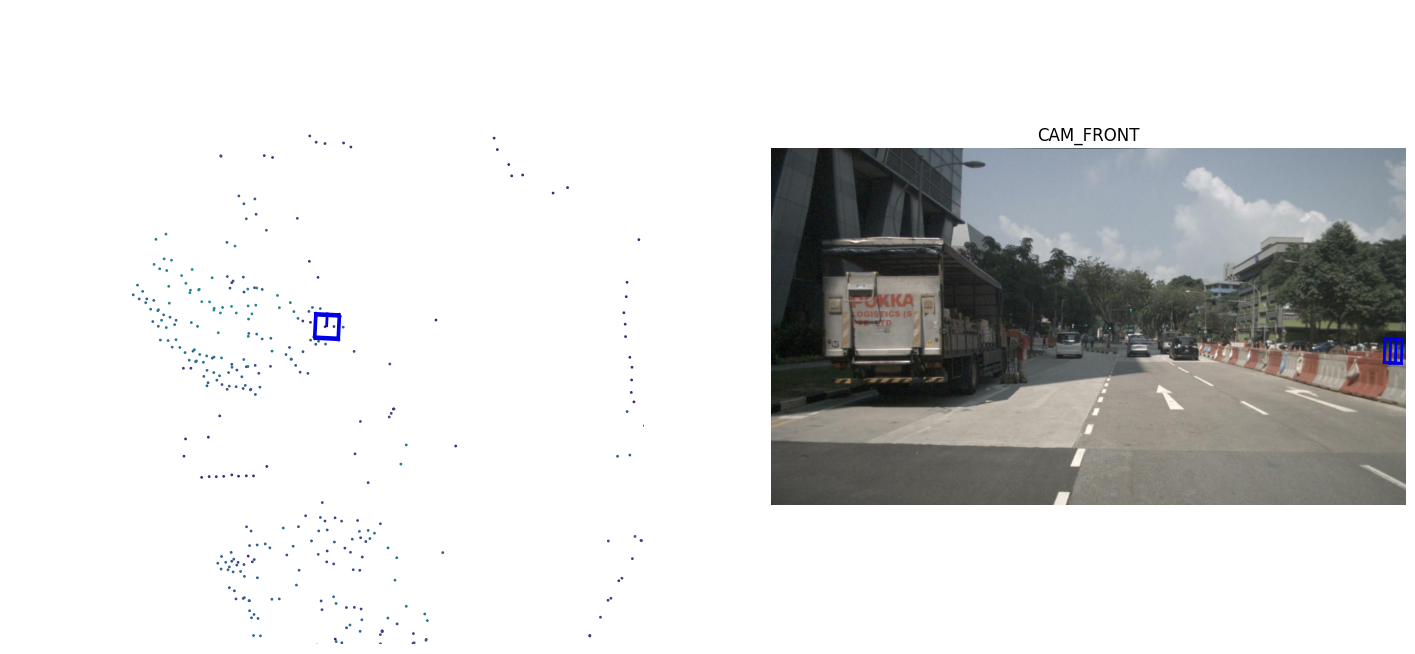

In [7]:
nusc.render_annotation(annotation_metadata['token'])

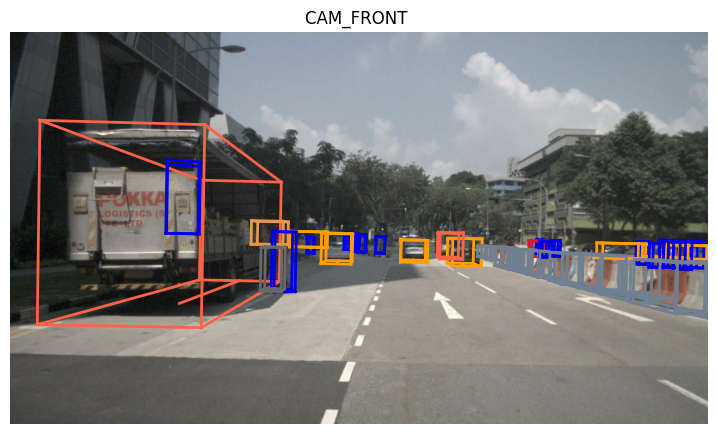

In [8]:
nusc.render_sample_data(cam_front_data['token'], with_anns=True)

In [12]:
image_path, boxes, cam_intrinsic = nusc.get_sample_data(cam_front_data['token'])

In [13]:
boxes[0].name

'human.pedestrian.adult'

In [14]:
boxes[0].center

array([18.6388298 ,  0.19359276, 59.02486732])

In [15]:
from PIL import Image
import numpy as np

img = Image.open(image_path)
np.asarray(img).shape

(900, 1600, 3)

In [16]:
cam_intrinsic

array([[1.26641720e+03, 0.00000000e+00, 8.16267020e+02],
       [0.00000000e+00, 1.26641720e+03, 4.91507066e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [17]:
lidar_data = nusc.get('sample_data', sample['data']['LIDAR_TOP'])
lidar_data

{'token': '9d9bf11fb0e144c8b446d54a8a00184f',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': '9d9bf11fb0e144c8b446d54a8a00184f',
 'calibrated_sensor_token': 'a183049901c24361a6b0b11b8013137c',
 'timestamp': 1532402927647951,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/LIDAR_TOP/n015-2018-07-24-11-22-45+0800__LIDAR_TOP__1532402927647951.pcd.bin',
 'prev': '',
 'next': '0cedf1d2d652468d92d23491136b5d15',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

In [18]:
radar_front_data = nusc.get('sample_data', sample['data']['RADAR_FRONT'])
radar_front_data

{'token': '37091c75b9704e0daa829ba56dfa0906',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': '37091c75b9704e0daa829ba56dfa0906',
 'calibrated_sensor_token': 'f4d2a6c281f34a7eb8bb033d82321f79',
 'timestamp': 1532402927664178,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402927664178.pcd',
 'prev': '',
 'next': 'f0b8593e08594a3eb1152c138b312813',
 'sensor_modality': 'radar',
 'channel': 'RADAR_FRONT'}

In [19]:
# nusc.get_sample_data(radar_front_data['token'])

In [20]:
# nusc.get_sample_data(lidar_data['token'])

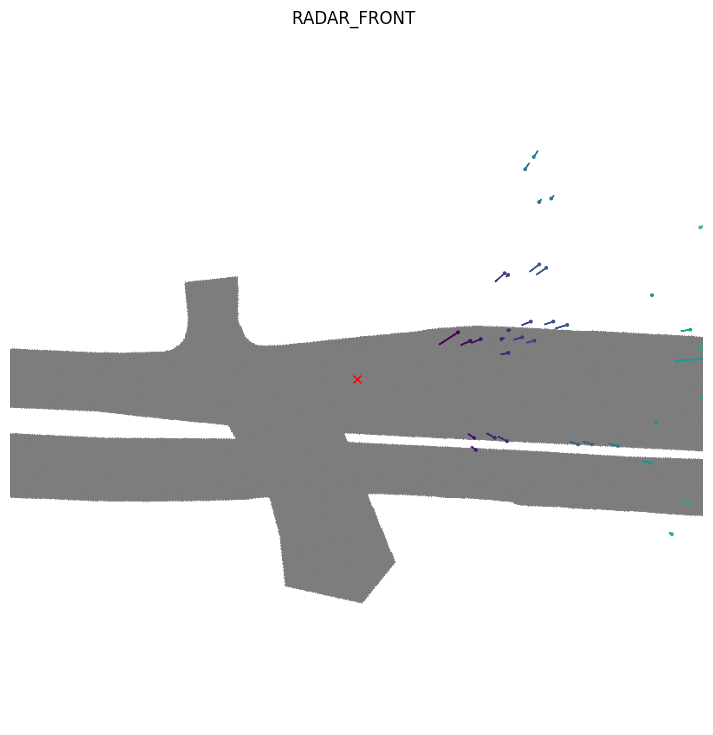

In [21]:
nusc.render_sample_data(radar_front_data['token'], with_anns=False)

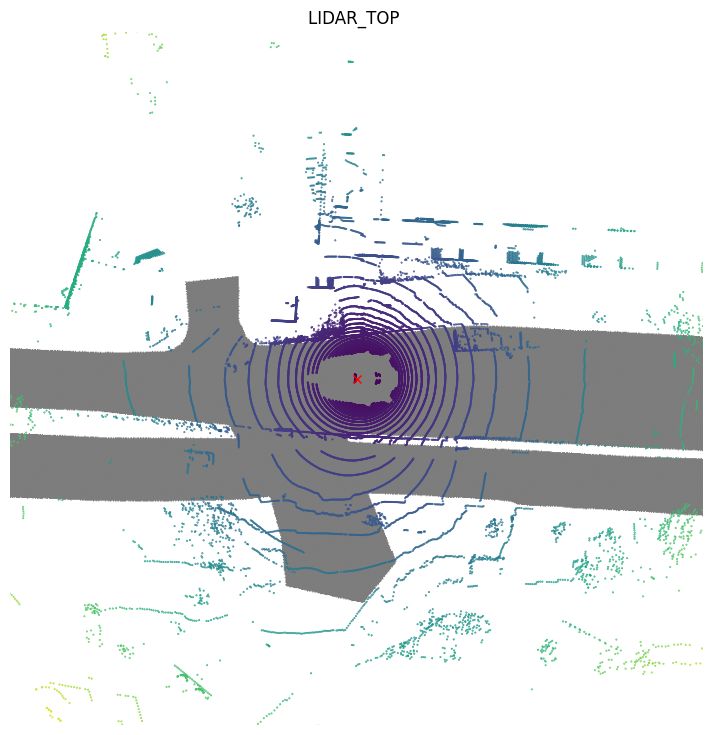

In [22]:
nusc.render_sample_data(lidar_data['token'], with_anns=False)

In [7]:
nusc.list_categories()

Category stats for split v1.0-mini:
human.pedestrian.adult      n= 4765, width= 0.68±0.11, len= 0.73±0.17, height= 1.76±0.12, lw_aspect= 1.08±0.23
human.pedestrian.child      n=   46, width= 0.46±0.08, len= 0.45±0.09, height= 1.37±0.06, lw_aspect= 0.97±0.05
human.pedestrian.constructi n=  193, width= 0.69±0.07, len= 0.74±0.12, height= 1.78±0.05, lw_aspect= 1.07±0.16
human.pedestrian.personal_m n=   25, width= 0.83±0.00, len= 1.28±0.00, height= 1.87±0.00, lw_aspect= 1.55±0.00
human.pedestrian.police_off n=   11, width= 0.59±0.00, len= 0.47±0.00, height= 1.81±0.00, lw_aspect= 0.80±0.00
movable_object.barrier      n= 2323, width= 2.32±0.49, len= 0.61±0.11, height= 1.06±0.10, lw_aspect= 0.28±0.09
movable_object.debris       n=   13, width= 0.43±0.00, len= 1.43±0.00, height= 0.46±0.00, lw_aspect= 3.35±0.00
movable_object.pushable_pul n=   82, width= 0.51±0.06, len= 0.79±0.10, height= 1.04±0.20, lw_aspect= 1.55±0.18
movable_object.trafficcone  n= 1378, width= 0.47±0.14, len= 0.45±0.07, heigh

In [8]:
nusc.category[9]

{'token': 'dfd26f200ade4d24b540184e16050022',
 'name': 'vehicle.motorcycle',
 'description': 'Gasoline or electric powered 2-wheeled vehicle designed to move rapidly (at the speed of standard cars) on the road surface. This category includes all motorcycles, vespas and scooters.'}

In [9]:
my_instance = nusc.instance[27]
first_token = my_instance['first_annotation_token']
last_token = my_instance['last_annotation_token']
nbr_samples = my_instance['nbr_annotations']
current_token = first_token

i = 0
found_change = False
while current_token != last_token:
    current_ann = nusc.get('sample_annotation', current_token)
    current_attr = nusc.get('attribute', current_ann['attribute_tokens'][0])['name']

    if i == 0:
        pass
    elif current_attr != last_attr:
        print("Changed from `{}` to `{}` at timestamp {} out of {} annotated timestamps".format(last_attr, current_attr, i, nbr_samples))
        found_change = True

    next_token = current_ann['next']
    current_token = next_token
    last_attr = current_attr
    i += 1

Changed from `pedestrian.moving` to `pedestrian.standing` at timestamp 21 out of 39 annotated timestamps
